$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [ ]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2

In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [ ]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array 
  #Complete the code to compute step length
  step_length = np.linalg.multi_dot([gradf,gradf]) / np.matmul(gradf,np.matmul(2*A,gradf))
  return step_length

In [ ]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  while evalf(x-(alpha*gradf))>(evalf(x)-(gamma*alpha*(np.linalg.multi_dot([gradf,gradf])))):
     alpha=rho*alpha
  #print('final step length:',alpha)
  return alpha

In [ ]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #calling the new function you wrote to compute the steplength
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
    elif line_search_type == CONSTANT_STEP_LENGTH: #doing a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
    fvals =evalf(x)
  return x, k, fvals


#Q-3

$\text{Finding the minimizer of the function:} \\
\text{Here, $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$} \\
\text{Differentiating with respect to $x_1$ and equating to 0, we get..}\\
2(x_1-8)=0 \\
\Rightarrow x_1=8 \\
\text{Simillarly, differentiating with respect to $x_2$ and equating to 0, we get..} \\
2(x_2+12)=0 \\
\Rightarrow x_2=-12 \\
\text{Hence, the minimizer value is: [8, -12]}
 $

#Q-4

In [ ]:

my_start_x1 = np.array([25,25])
my_tol1= 1e-12


x_opt1, no_itr1,func_value1 = find_minimizer(my_start_x1, my_tol1,EXACT_LINE_SEARCH )
print('Using exact line search method:','Minimizer:',x_opt1,'No of iterations',no_itr1,'Objective function value',func_value1)

x_opt_bls1,no_itr_bls1,func_value_bls1 = find_minimizer(my_start_x1, my_tol1, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print('Using backtracking line search method:','Minimizer',x_opt_bls1,'No of iterations',no_itr_bls1,'Objective function value',func_value_bls1)

Using exact line search method: Minimizer: [  8. -12.] No of iterations 1 Objective function value 0.0
Using backtracking line search method: Minimizer [  8. -12.] No of iterations 1 Objective function value 0.0


$\text{When $\alpha$=1, $\rho$=0.5 and $\gamma$=0.5, in both the cases, the no. of iterations is same i.e. 1. Moreover, as the optimizer value is same so does the function value.}$

#Q-5:

In [ ]:
my_start_x2 = np.array([25,25])
my_tol2= 1e-10
no_itr_list=[]
alpha_list=[1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
print('Using exact line search method:')
x_opt2, no_itr2,func_value2 = find_minimizer(my_start_x2, my_tol2,EXACT_LINE_SEARCH )
print('Minimizer',x_opt2,'No of iteration:',no_itr2,'Objective function value:',func_value2)
for i in alpha_list:
  x_opt_val,no_itr_val,func_value_1 = find_minimizer(my_start_x2, my_tol2, BACKTRACKING_LINE_SEARCH, i, 0.5,0.5)
  no_itr_list.append(no_itr_val)
  print('Using backtracking line search method: ',end =' ')
  print('For alpha=',i,'Minimizer:',x_opt_val,'NO. of iterations:',no_itr_val,'Objective function value:',func_value_1)

Using exact line search method:
Minimizer [  8. -12.] No of iteration: 1 Objective function value: 0.0
Using backtracking line search method:  For alpha= 1 Minimizer: [  8. -12.] NO. of iterations: 1 Objective function value: 0.0
Using backtracking line search method:  For alpha= 0.9 Minimizer: [  8. -12.] NO. of iterations: 12 Objective function value: 1.6579714975258972e-21
Using backtracking line search method:  For alpha= 0.75 Minimizer: [  8. -12.] NO. of iterations: 20 Objective function value: 1.3714654556129199e-21
Using backtracking line search method:  For alpha= 0.6 Minimizer: [  8. -12.] NO. of iterations: 30 Objective function value: 2.2038291998576117e-21
Using backtracking line search method:  For alpha= 0.5 Minimizer: [  8. -12.] NO. of iterations: 1 Objective function value: 0.0
Using backtracking line search method:  For alpha= 0.4 Minimizer: [  8. -12.] NO. of iterations: 18 Objective function value: 1.1393259623274523e-22
Using backtracking line search method:  For 

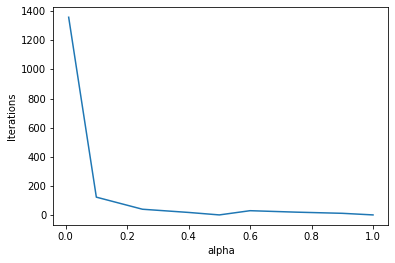

In [ ]:
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(alpha_list,no_itr_list)
plt.ylabel('Iterations')
plt.xlabel('alpha')
plt.show()

$\text{The value of $\alpha$ $\propto$ $\frac{1}{Iterations}$ . Therefore, as the value of $\alpha$ decreases, the no. of iterations is increasing exponentially.}$ \\
$\text{The functional value is 0 at $\alpha$ =0.5 and  $\alpha$ =1}$ \\
$\text{The functional value started increasing when $\alpha$ started decreasing from 0.5 to 0.01}$

In [ ]:
for i in alpha_list:
  x_opt_val,no_itr_val,func_value_2 = find_minimizer(my_start_x2, my_tol2, EXACT_LINE_SEARCH, i, 0.5,0.5)
  print('Using exact line search method:',end =' ')
  print('For alpha=',i,'Minimizer:',x_opt_val,'NO. of iterations:',no_itr_val,'Objective function value:',func_value_2)

Using exact line search method: For alpha= 1 Minimizer: [  8. -12.] NO. of iterations: 1 Objective function value: 0.0
Using exact line search method: For alpha= 0.9 Minimizer: [  8. -12.] NO. of iterations: 1 Objective function value: 0.0
Using exact line search method: For alpha= 0.75 Minimizer: [  8. -12.] NO. of iterations: 1 Objective function value: 0.0
Using exact line search method: For alpha= 0.6 Minimizer: [  8. -12.] NO. of iterations: 1 Objective function value: 0.0
Using exact line search method: For alpha= 0.5 Minimizer: [  8. -12.] NO. of iterations: 1 Objective function value: 0.0
Using exact line search method: For alpha= 0.4 Minimizer: [  8. -12.] NO. of iterations: 1 Objective function value: 0.0
Using exact line search method: For alpha= 0.25 Minimizer: [  8. -12.] NO. of iterations: 1 Objective function value: 0.0
Using exact line search method: For alpha= 0.1 Minimizer: [  8. -12.] NO. of iterations: 1 Objective function value: 0.0
Using exact line search method: 

$\text{Using Exact line search, the no. of iterations is same i.e 1 $∀$ values of $\alpha$ but, this is not the case for Backtracking line search.}$

#Q-6:

In [ ]:
my_start_x3 = np.array([25,25])
my_tol3= 1e-10
no_itr_list_new=[]
rho_list=[0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
for i in rho_list:
  x_opt_val,no_itr_val,func_val = find_minimizer(my_start_x3, my_tol3, BACKTRACKING_LINE_SEARCH, 1, i,0.5)
  no_itr_list_new.append(no_itr_val)
  print('For rho=',i,'Minimizer',x_opt_val,'No of iterations',no_itr_val,'Objective function value:',func_val)

For rho= 0.9 Minimizer [  8. -12.] No of iterations 9 Objective function value: 4.960536411900771e-22
For rho= 0.75 Minimizer [  8. -12.] No of iterations 15 Objective function value: 1.0819468296335504e-21
For rho= 0.6 Minimizer [  8. -12.] No of iterations 22 Objective function value: 7.844395544174143e-22
For rho= 0.5 Minimizer [  8. -12.] No of iterations 1 Objective function value: 0.0
For rho= 0.4 Minimizer [  8. -12.] No of iterations 18 Objective function value: 1.1393259623274523e-22
For rho= 0.25 Minimizer [  8. -12.] No of iterations 40 Objective function value: 1.3714654556129199e-21
For rho= 0.1 Minimizer [  8. -12.] No of iterations 123 Objective function value: 2.3972320602008796e-21
For rho= 0.01 Minimizer [  8. -12.] No of iterations 1358 Objective function value: 2.4523367712209537e-21


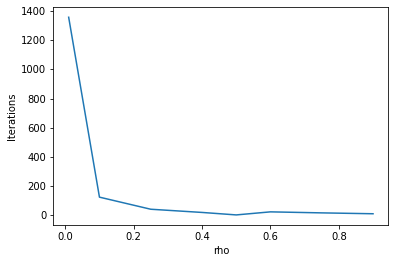

In [ ]:
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(rho_list,no_itr_list_new)
plt.xlabel('rho')
plt.ylabel('Iterations')
plt.show()

$\text{At $\rho$=0.5, within only 1 iteration, the function value became 0 and we got the optimizer but as the $\rho$ decreases further, the no. of iterations increases and also the function value also increases. }$ \\


In [ ]:
my_start_x3 = np.array([25,25])
my_tol3= 1e-10
rho_list=[0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
for i in rho_list:
  x_opt_val,no_itr_val,func_val = find_minimizer(my_start_x3, my_tol3, EXACT_LINE_SEARCH, 1, i,0.5)
  print('For rho=',i,'Minimizer',x_opt_val,'No of iterations',no_itr_val,'Objective function value:',func_val)

For rho= 0.9 Minimizer [  8. -12.] No of iterations 1 Objective function value: 0.0
For rho= 0.75 Minimizer [  8. -12.] No of iterations 1 Objective function value: 0.0
For rho= 0.6 Minimizer [  8. -12.] No of iterations 1 Objective function value: 0.0
For rho= 0.5 Minimizer [  8. -12.] No of iterations 1 Objective function value: 0.0
For rho= 0.4 Minimizer [  8. -12.] No of iterations 1 Objective function value: 0.0
For rho= 0.25 Minimizer [  8. -12.] No of iterations 1 Objective function value: 0.0
For rho= 0.1 Minimizer [  8. -12.] No of iterations 1 Objective function value: 0.0
For rho= 0.01 Minimizer [  8. -12.] No of iterations 1 Objective function value: 0.0


$\text{Using Exact line search, the no. of iterations is same i.e 1 $∀$ values of $\rho$ but, this is not the case for Backtracking line search.}$